<a href="https://colab.research.google.com/github/Dmitrii-Melkikh/Pandas_and_R_coding/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_R_%D0%9C%D0%B5%D0%BB%D0%BA%D0%B8%D1%85_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных композиций.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

> **NB!** *Для выполнения задания возьмите 30 тысяч случайных строк из датасета.*

# Часть 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%load_ext rpy2.ipython


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R

install.packages("corrplot")
install.packages('plotly')
library(corrplot)

df <- read.csv("/content/drive/MyDrive/music_genre.csv", header = TRUE)
df <- df[(df$duration_ms > 0) & (df$artist_name != 'empty_field'),]
df <- df[complete.cases(df), ]
set.seed(8)
df <- df[sample(nrow(df), 30000),]



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.92.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3765850 bytes (3.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

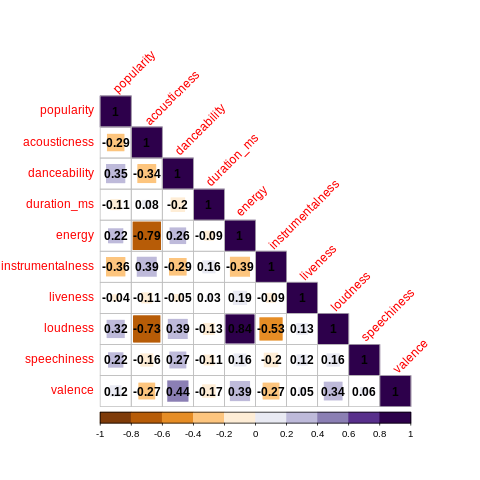

In [ ]:
%%R
df_new<-df
corrplot(cor(df_new[c('popularity', 'acousticness', 'danceability',  'duration_ms', 'energy', 'instrumentalness', 'liveness','loudness', 'speechiness','valence')], use="complete.obs"),
method="square", type="lower", addCoef.col = 'black', tl.srt=45, col=COL2("PuOr",10))



## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

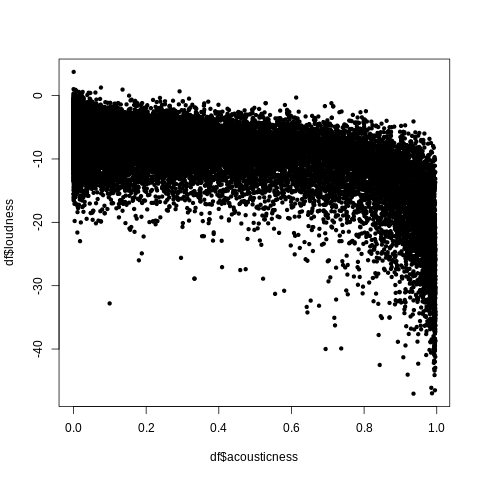

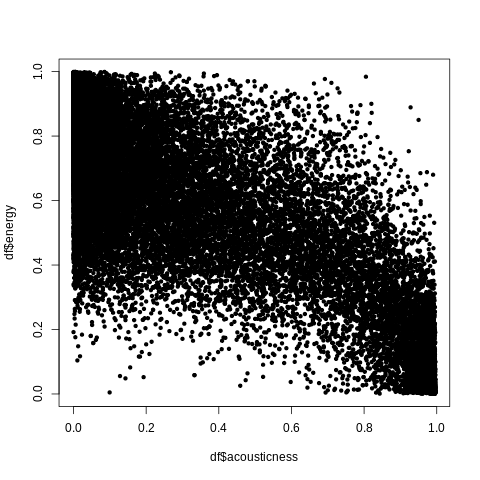

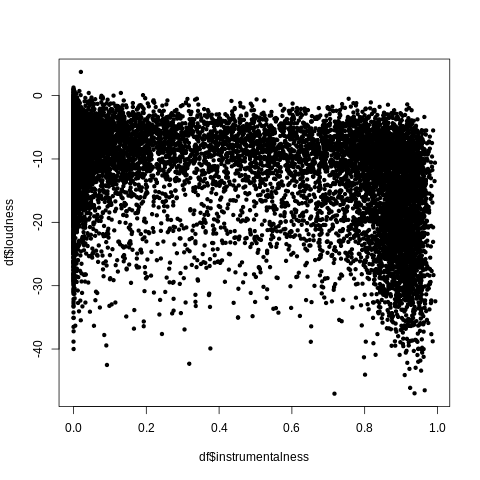

In [ ]:
%%R
plot(df$acousticness, df$loudness, pch=20)
plot(df$acousticness, df$energy, pch=20)
plot(df$instrumentalness, df$loudness, pch=20)

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.


Alternative       Anime       Blues   Classical     Country  Electronic 
       2959        3032        2964        2937        3022        3048 
    Hip-Hop        Jazz         Rap        Rock 
       3038        3018        2947        3030 


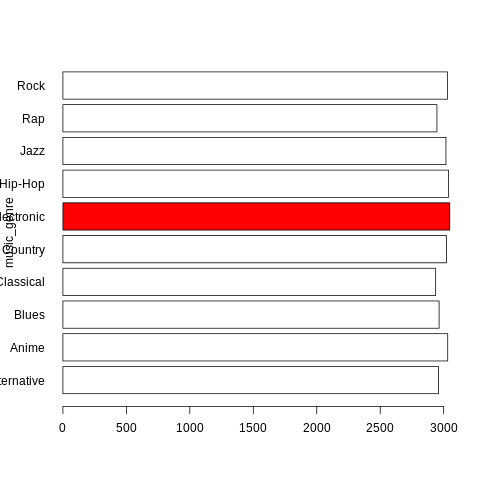

In [ ]:
%%R
library(dplyr)
colors = c('white', 'white', 'white', 'white', 'white', 'red', 'white', 'white', 'white', 'white')
df_new <-df[order(df$music_genre, decreasing = FALSE),]
print(table(df_new$music_genre))
barplot(table(df_new$music_genre), col=colors, ylab="music_genre", horiz=TRUE, las=1)



## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
# PUT YOUR CODE HERE

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

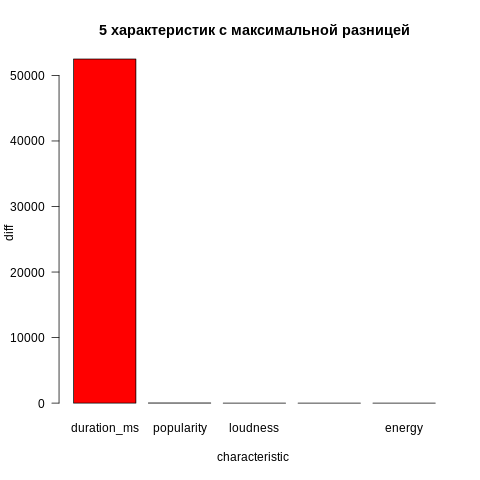

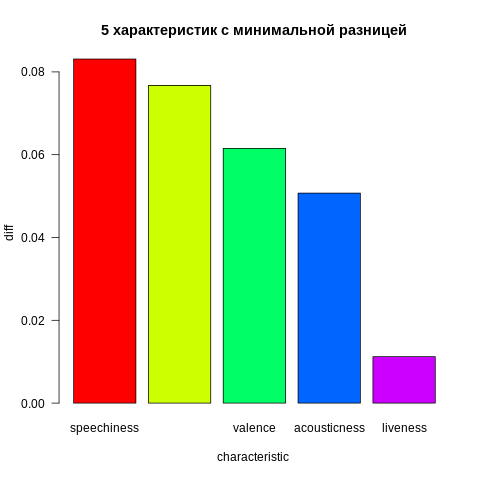

In [ ]:
%%R
library(dplyr)


top <- count(df, music_genre, sort=TRUE)
top_g <- top[1,1]
worst_g <- top[10,1]
g_first <- df[df$music_genre == top_g,][,-c(1,2,3,10,13,15,16,18)]
g_last <- df[df$music_genre == worst_g,][,-c(1,2,3,10,13,15,16,18)]


top_new <- data.frame('characteristic'=('-'), top_genre=(0), worst_genre=(0), 'diff'=(0))


for (i in colnames(g_last))  {top_new[nrow(top_new) + 1,] = list(i, mean(g_first[,i]), mean(g_last[,i]), abs(mean(g_first[,i])-mean(g_last[,i])))}

top_new <- top_new[-1,]
top_new <- top_new[order(top_new$diff, decreasing=TRUE),]


barplot(head(top_new$diff, n=5), col=rainbow(5), names.arg=head(top_new$characteristic, n=5), ylab = "diff", xlab = "characteristic ", las = 1, main="5 характеристик с максимальной разницей")
barplot(tail(top_new$diff, n=5), col=rainbow(5), names.arg=tail(top_new$characteristic, n=5), ylab = "diff", xlab = "characteristic ", las = 1, main="5 характеристик с минимальной разницей")

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

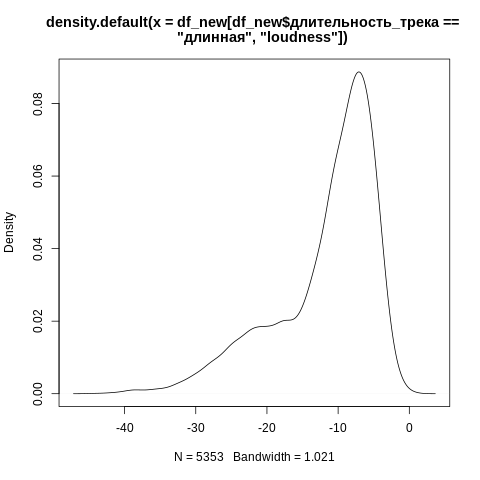

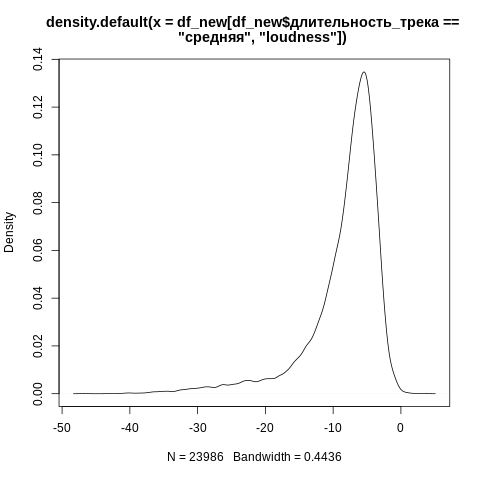

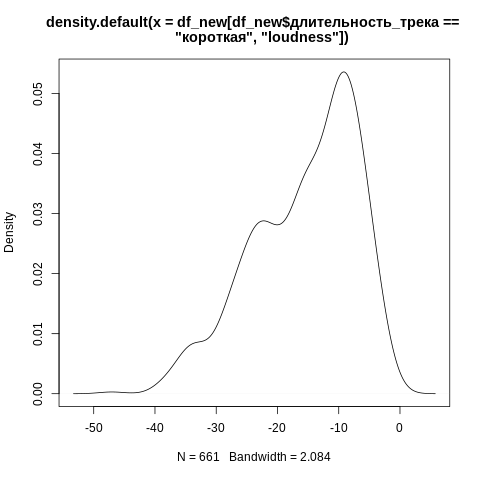

In [ ]:
%%R

df_new<-df
df_new['длительность_трека'] <- ''
df_new[df_new$duration_ms > 300000,]$длительность_трека <- 'длинная'
df_new[df_new$duration_ms >= 100000 & df_new$duration_ms<=300000,]$длительность_трека <- 'средняя'
df_new[df_new$duration_ms < 100000,]$длительность_трека <- 'короткая'
plot(density(df_new[df_new$длительность_трека == 'длинная', 'loudness']))
plot(density(df_new[df_new$длительность_трека == 'средняя', 'loudness']))
plot(density(df_new[df_new$длительность_трека == 'короткая', 'loudness']))

## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

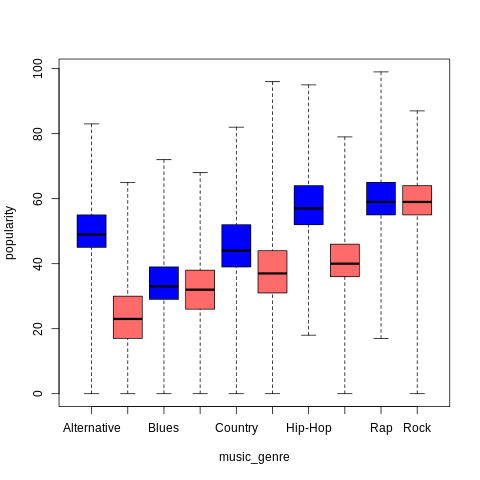

In [ ]:
%%R

boxplot(popularity ~ music_genre, data = df, range = 0, col = c("blue","indianred1"))

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

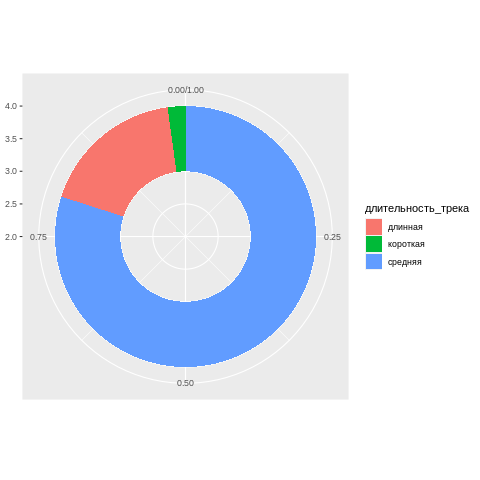

In [ ]:
%%R

library(ggplot2)


df_new<-df

df_new['длительность_трека'] <- ''

df_new[df_new$duration_ms > 300000,]$длительность_трека <- 'длинная'
df_new[df_new$duration_ms >= 100000 & df_new$duration_ms<=300000,]$длительность_трека <- 'средняя'
df_new[df_new$duration_ms < 100000,]$длительность_трека <- 'короткая'


df_1 <- count(df_new, длительность_трека, sort=TRUE)
df_1$a = df_1$n/sum(df_1$n)
df_1$ymax = cumsum(df_1$a)
df_1$ymin = c(0, head(df_1$ymax, n=-1))

ggplot(df_1, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=длительность_трека)) +
     geom_rect() +
     coord_polar(theta="y")+xlim(c(2, 4)) 

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

## Задание 9

Покажите на карте количество кофеен в каждой строне, данные о которой есть в датасете.

In [ ]:
# PUT YOUR CODE HERE

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
# PUT YOUR CODE HERE